In [1]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
import collections, math, operator

from scipy.special import expit

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

In [2]:
## Part 1
DistanceFlagPair = collections.namedtuple('Distance', 'distance flag')

class DataFormat():

    def __init__(self, name):
        self.name = name

    def func_norm_data(self):
        src_data = genfromtxt(self.name, delimiter=',')
        flag_data, feature_data = src_data[:,0], np.delete(src_data, 0, axis=1)
        feature_max, feature_min = np.amax(feature_data, axis=0), np.amin(feature_data, axis=0)
        feature_range, feature_avg = feature_max - feature_min, np.average(feature_data)
        norm_data = (feature_data - feature_avg) / feature_range
        self.norm_data, self.flag_data = norm_data, flag_data
        return norm_data, flag_data

    def func_leave_out(self, index):
        return self.norm_data[index], self.flag_data[index]

class KNN():

    def __init__(self, norm_data, flag_data):
        self.norm_data, self.flag_data = norm_data, flag_data

    def func_classify(self, test_data, k):
        neigbor_pair = self.func_build_neigbor(test_data)
        flag_sum = np.sum([neigbor.flag for neigbor in neigbor_pair[:k]])
        return -1 if flag_sum < 0 else 1
        
    def func_build_neigbor(self, test_data):
        diff_sqrt = (test_data - self.norm_data) ** 2
        distance_data = np.sqrt(np.sum(diff_sqrt, axis=1))
        neigbor_pair = []
        for i in range(len(distance_data)):
            neigbor = DistanceFlagPair(distance_data[i], self.flag_data[i])
            neigbor_pair.append(neigbor)
        return sorted(neigbor_pair, key=operator.attrgetter('distance'))        

def func_calc_error(data, knn, k = 1):
    temp_data = [knn.func_classify(classifier, k) for classifier in data.norm_data]
    return np.sum(np.abs(temp_data - data.flag_data)) / float(2 * len(data.flag_data))
    
def func_cross_valid_error(data, knn, k = 1):
    error = 0
    for i in range(len(data.norm_data)):
        norm, flag = data.func_leave_out(i)
        flag_sum = knn.func_classify(norm, k)
        flag_error = np.abs(flag - flag_sum) / 2
        error += flag_error
    return float(error) / (len(data.flag_data) + 1) 

Training: [0.0, 0.017605633802816902, 0.017605633802816902, 0.021126760563380281, 0.031690140845070422, 0.042253521126760563, 0.031690140845070422, 0.035211267605633804, 0.035211267605633804, 0.03873239436619718, 0.042253521126760563, 0.042253521126760563, 0.045774647887323945, 0.052816901408450703, 0.052816901408450703, 0.052816901408450703, 0.049295774647887321, 0.052816901408450703, 0.049295774647887321, 0.052816901408450703, 0.059859154929577461, 0.059859154929577461, 0.066901408450704219, 0.066901408450704219, 0.066901408450704219, 0.066901408450704219]
Cross Valid: [0.0, 0.017543859649122806, 0.017543859649122806, 0.021052631578947368, 0.031578947368421054, 0.042105263157894736, 0.031578947368421054, 0.03508771929824561, 0.03508771929824561, 0.03859649122807018, 0.042105263157894736, 0.042105263157894736, 0.0456140350877193, 0.05263157894736842, 0.05263157894736842, 0.05263157894736842, 0.04912280701754386, 0.05263157894736842, 0.04912280701754386, 0.05263157894736842, 0.05964912

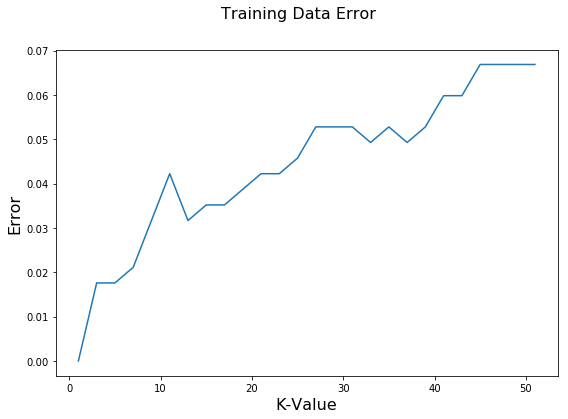

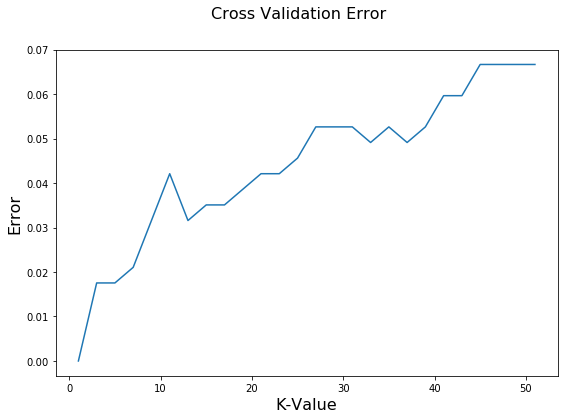

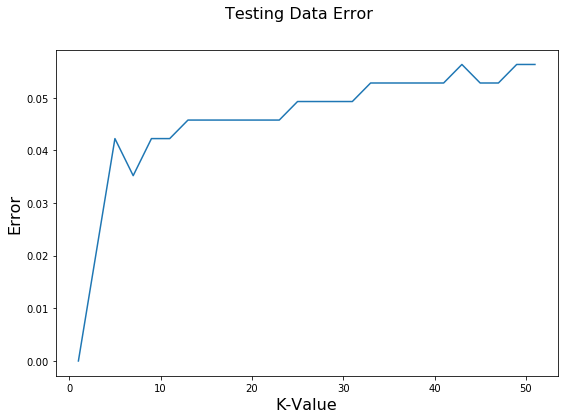

In [3]:
def func_plot_data(x_list, y_list, label):
    fig = plt.figure(figsize=(9,6))
    plt.plot(x_list, y_list, label=label)
#     plt.legend()
    fig.suptitle(label + ' Error', fontsize=16)
    plt.xlabel('K-Value', fontsize=16)
    plt.ylabel('Error', fontsize=16)
    
if __name__ == '__main__':
    train_data, test_data = DataFormat('knn_train.csv'), DataFormat('knn_test.csv')
    train_norm_data, train_flag_data = train_data.func_norm_data()
    test_norm_data, test_flag_data = test_data.func_norm_data()
    knn_train, knn_test = KNN(train_norm_data, train_flag_data), KNN(test_norm_data, test_flag_data)
    k_list, train_error_list, cross_valid_list, test_error_list = range(1, 52, 2), [], [], []
    for k in k_list:
        train_error = func_calc_error(train_data, knn_train, k)
        train_error_list.append(train_error)
        cross_valid = func_cross_valid_error(train_data, knn_train, k)
        cross_valid_list.append(cross_valid)
        test_error = func_calc_error(test_data, knn_test, k)
        test_error_list.append(test_error)

    print 'Training:', train_error_list
    func_plot_data(k_list, train_error_list, 'Training Data')
    
    print 'Cross Valid:', cross_valid_list
    func_plot_data(k_list, cross_valid_list, 'Cross Validation')
    
    print 'Testing:', test_error_list    
    func_plot_data(k_list, test_error_list, 'Testing Data')